### Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn import neighbors
from math import sqrt
%matplotlib notebook
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

### 1. Data cleaning and preparation. Be careful with those missing data and outliers.

In [2]:
df=pd.read_csv(r'train.csv')
tdf=pd.read_csv(r'test.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df = df[df.columns[df.isnull().mean() < 0.60]] #dropping columns with more than 60% missing value
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [5]:
tdf = tdf[tdf.columns[tdf.isnull().mean() < 0.60]]

In [6]:
df_o = df.select_dtypes(include=['object']).copy();
tdf_o = tdf.select_dtypes(include=['object']).copy();

In [7]:
df.drop(df_o.columns.values, axis=1, inplace = True)
tdf.drop(tdf_o.columns.values, axis=1, inplace = True)

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
for cols in df.columns.values:
    df[cols] = df[cols].fillna(df[cols].median())

for cols in tdf.columns.values:
    tdf[cols] = tdf[cols].fillna(tdf[cols].median())    

l = LabelEncoder()

for cols in df_o.columns[df_o.isnull().any()]:
    df_o[cols] = df_o[cols].fillna('NA')

for cols in df_o.columns.values:
    df_o[cols] = l.fit_transform(df_o[cols])
    
for cols in tdf_o.columns[tdf_o.isnull().any()]:
    tdf_o[cols] = tdf_o[cols].fillna('NA')

for cols in tdf_o.columns.values:
    tdf_o[cols] = l.fit_transform(tdf_o[cols])    

<ipython-input-8-41c93ba02893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].fillna(df[cols].median())


In [9]:
df = pd.concat([df,df_o], axis=1)
tdf = pd.concat([tdf,tdf_o], axis=1)

In [10]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,3,1,2,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,5,1,2,5,5,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,5,1,2,5,5,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,3,5,5,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,5,1,2,5,5,2,8,4


### Removing Outliers

<AxesSubplot:xlabel='SalePrice'>

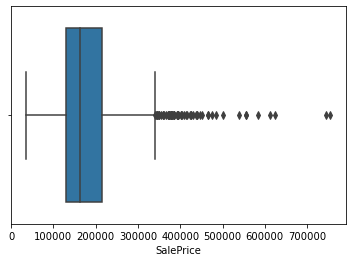

In [11]:
import seaborn as sns
sns.boxplot(x=df['SalePrice'])

In [12]:
upper_lim = df['SalePrice'].quantile(.95)
lower_lim = df['SalePrice'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data

df = df[(df['SalePrice'] < upper_lim) & (df['SalePrice'] > lower_lim)]

In [13]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,3,1,2,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,5,1,2,5,5,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,5,1,2,5,5,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,3,5,5,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,5,1,2,5,5,2,8,4


### 2. Use the feature engineering techniques to create 10 new features and give your rationales. It can be common sense, or statistics or by any techniques in last class.

In [16]:
df['TotalBsmtBath'] = df['BsmtFullBath'] + df['BsmtFullBath']*0.5
df['TotalBath'] = df['FullBath'] + df['HalfBath']*0.5 
df['TotalSA']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df["TotalPorchSF"] = df["WoodDeckSF"] + df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"] 

In [17]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1312, dtype: int64

In [18]:
degree_mean=df.groupby('SalePrice').mean().rename(columns={'GrLivArea':'GrLivArea_mean_by_saleprice'})
degree_std=df.groupby('SalePrice').std().rename(columns={'GrLivArea':'GrLivArea_std_by_saleprice'})
df=pd.merge(pd.merge(df, degree_mean, on='SalePrice'), degree_std, on='SalePrice')

In [19]:
df['GrLivArea_level']=(df['GrLivArea']-df['GrLivArea_mean_by_saleprice'])/df['GrLivArea_std_by_saleprice']

In [20]:
df.tail()

,Id_x,MSSubClass_x,LotFrontage_x,LotArea_x,OverallQual_x,OverallCond_x,YearBuilt_x,YearRemodAdd_x,MasVnrArea_x,BsmtFinSF1_x,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF,GrLivArea_level
1307,1450,180,21.0,1533,5,7,1970,1970,0.0,553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

df['total_floors'] = df['2ndFlrSF'] + df['1stFlrSF']
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['YearsSinceRemodel'] = df['YearRemodAdd'] - df['YearBuilt']

In [22]:
df

,Id_x,MSSubClass_x,LotFrontage_x,LotArea_x,OverallQual_x,OverallCond_x,YearBuilt_x,YearRemodAdd_x,MasVnrArea_x,BsmtFinSF1_x,...,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF,GrLivArea_level,total_floors,hasgarage,hasbsmt,hasfireplace,YearsSinceRemodel
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1.060660,0.707107,137.178716,190.918831,0.707107,363.452886,1,1,0,-53.740115
3,808,70,144.0,21384,5,6,1923,2004,0.0,1309,...,1.060660,0.707107,137.178716,190.918831,-0.707107,363.452886,1,1,0,-53.740115
4,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.769484,0.447214,311.629415,139.601086,1.164622,488.091626,1,1,1,-8.518529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1450,180,21.0,1533,5,7,1970,1970,0.0,553,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1308,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1309,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1310,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN


### 10 new features created

##### 1) TotalBsmtBath - Total no of Baths in the basement. It is the sum of all the full baths as 1 and half baths as 0.5 in a basement.
##### 2) TotalBath -  Total no of Baths in the house. It is the sum of all the full baths as 1 and half baths as 0.5 in a house.
##### 3) TotalSA - Total square feet area which is the sum of square feet areas of the basement, firstfloor and second floor
##### 4) TotalPorchSF - total porch surface area is useful to see how much outdoor space is there in the property
##### 5) GrLivArea_level - Ground Living area level, it is calculated using feature engineering
##### 6) total_floors - The total number of floors in the house that is sum of first floors and second floors.
##### 7) hasgarage - If the "GarageArea" column is greater than 1 set the value of new col as 1 else 0.
##### 8) hasbsmt - If the "basement" column is greater than 1 set the value of new col as 1 else 0.
##### 9) hasfireplace - If the "Fireplaces" column is greater than 1 set the value of new col as 1 else 0.
##### 10) YearsSinceRemodel - his feature gives the number of years the house has been remodelled from the time it was first built.


In [23]:
data = df [['TotalBsmtBath', 'TotalBath', 'TotalSA', 'TotalPorchSF', 'GrLivArea_level', 'total_floors', 'hasgarage', 'hasbsmt', 'hasfireplace', 'YearsSinceRemodel', 'SalePrice' ] ]


In [24]:
for cols in data.columns.values:
    data[cols] = data[cols].fillna(data[cols].median())

<ipython-input-24-e8cf611d4492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols] = data[cols].fillna(data[cols].median())


In [25]:
data

,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF,GrLivArea_level,total_floors,hasgarage,hasbsmt,hasfireplace,YearsSinceRemodel,SalePrice
0,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,208500
1,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,181500
2,1.060660,0.707107,137.178716,190.918831,0.707107,363.452886,1,1,0,-53.740115,223500
3,1.060660,0.707107,137.178716,190.918831,-0.707107,363.452886,1,1,0,-53.740115,223500
4,0.769484,0.447214,311.629415,139.601086,1.164622,488.091626,1,1,1,-8.518529,140000
...,...,...,...,...,...,...,...,...,...,...,...
1307,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,92000
1308,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,287090
1309,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,266500
1310,0.774597,0.408248,325.269119,119.201510,-0.149813,601.592032,0,0,0,-2.437183,142125


In [26]:
train = data.drop(['SalePrice'],axis=1)

In [27]:
target = data['SalePrice']

In [29]:

test = df.drop(['SalePrice'],axis=1)


### 3. Random Forest Regressor 

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [60]:
trainX,testX,trainY,testY = train_test_split(train,target, random_state=1)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(trainX,trainY)

RandomForestRegressor(max_depth=10, random_state=1)

In [63]:
rfr_predict = rfr.predict(testX)

In [64]:
rfr.fit(train, target)

RandomForestRegressor(max_depth=10, random_state=1)

In [65]:
rfr_predicty = rfr.predict(train)

In [71]:
submission_rfr = pd.DataFrame({
    "Id": test["Id_x"],
        "SalePrice": rfr_predicty
    })
submission_rfr.to_csv('randomforest.csv', index=False)

In [72]:
submission_rfr.head()

,Id,SalePrice
0,1,195080.312393
1,2,195080.312393
2,3,220727.000000
3,808,220259.000000
4,4,139366.958041


In [73]:
sqrt(mean_squared_error(testY,rfr_predict))

62129.27434017012

In [75]:
df

,Id_x,MSSubClass_x,LotFrontage_x,LotArea_x,OverallQual_x,OverallCond_x,YearBuilt_x,YearRemodAdd_x,MasVnrArea_x,BsmtFinSF1_x,...,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF,GrLivArea_level,total_floors,hasgarage,hasbsmt,hasfireplace,YearsSinceRemodel
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1.060660,0.707107,137.178716,190.918831,0.707107,363.452886,1,1,0,-53.740115
3,808,70,144.0,21384,5,6,1923,2004,0.0,1309,...,1.060660,0.707107,137.178716,190.918831,-0.707107,363.452886,1,1,0,-53.740115
4,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.769484,0.447214,311.629415,139.601086,1.164622,488.091626,1,1,1,-8.518529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1450,180,21.0,1533,5,7,1970,1970,0.0,553,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1308,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1309,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1310,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN


In [77]:
df['Id_x']

0          1
1          2
2          3
3        808
4          4
        ... 
1307    1450
1308    1452
1309    1458
1310    1459
1311    1460
Name: Id_x, Length: 1312, dtype: int64

### 4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.

In [87]:
df=pd.read_csv(r'train.csv')
tdf=pd.read_csv(r'test.csv')

In [88]:
df.columns=df.columns.str.lower()
tdf.columns=tdf.columns.str.lower()
total_df_cols=df.columns.tolist()

In [89]:
df.drop(['id'],axis=1,inplace=True)
tdf.drop(['id'],axis=1,inplace=True)

df_40_null_col=df.columns[(df.isnull().sum()/len(df))>=0.6]
df.drop(df_40_null_col,axis=1,inplace=True)
tdf.columns[(tdf.isnull().sum()/len(tdf))>0]

# handling null values by using fillna()
df.fillna(method='ffill',inplace=True)
#bfill had to be used because the first row value for fireplacequ column had a nan value
df.fireplacequ.fillna(method='bfill',inplace=True)
# replacing the target value with mode of the entire column
df["saleprice"].fillna(df["saleprice"].mean())

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: saleprice, Length: 1460, dtype: int64

In [90]:
# handling null values by using fillna()
tdf.fillna(method='ffill',inplace=True)
#bfill had to be used because the first row value for fireplacequ column had a nan value
tdf.fireplacequ.fillna(method='bfill',inplace=True)

In [91]:
df['totalbath'] = df['bsmtfullbath'] + df['fullbath'] + df['bsmthalfbath'] + df['halfbath']
df['totalfloors'] = df['2ndflrsf'] + df['1stflrsf']
df['yearsSinceRemodel'] = df['yearremodadd'].astype(int) - df['yearbuilt'].astype(int)
df['totalporchsf'] = (df['openporchsf'] + df['wooddecksf'])
df['lot_ratio'] = df['lotfrontage'] / df['lotarea']
tdf['totalbath'] = tdf['bsmtfullbath'] + tdf['fullbath'] + tdf['bsmthalfbath'] + tdf['halfbath']
tdf['totalfloors'] = tdf['2ndflrsf'] + tdf['1stflrsf']
tdf['yearsSinceRemodel'] = tdf['yearremodadd'].astype(int) - tdf['yearbuilt'].astype(int)
tdf['totalporchsf'] = (tdf['openporchsf'] + tdf['wooddecksf'])
tdf['lot_ratio'] = tdf['lotfrontage'] / tdf['lotarea']

In [92]:
drop_cols=["2ndflrsf","1stflrsf","yearremodadd","yearbuilt","openporchsf","wooddecksf","lotfrontage","lotarea","bsmtfullbath","fullbath","bsmthalfbath","halfbath"]
df.drop(drop_cols, axis=1, inplace=True)

<AxesSubplot:>

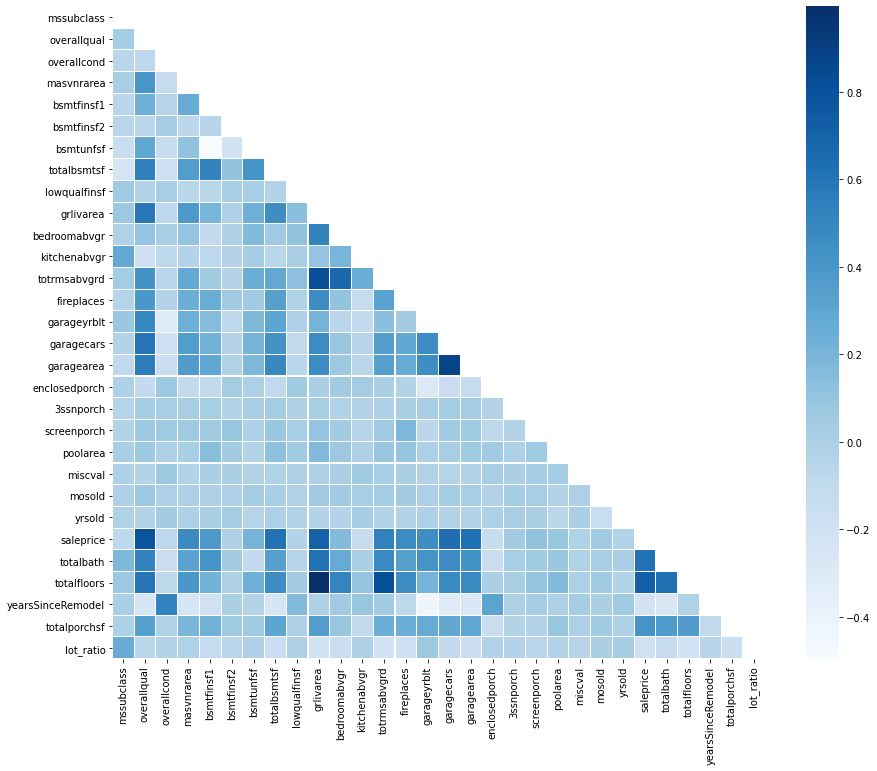

In [93]:
# Checking correlation between different numerical featuers
fig = plt.figure(figsize=(15,12)) 
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='Blues', mask=mask, linewidth=0.05, square=True)

In [94]:
correlation_table = pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates(), columns=['correlation'])
correlation_table[(correlation_table['correlation'] >0.8) | (correlation_table['correlation'] < -0.8)].sort_values(by='correlation', ascending = False)

correlation
mssubclass   mssubclass      1.000000
grlivarea    totalfloors     0.995718
garagearea   garagecars      0.882475
totrmsabvgrd grlivarea       0.825489
             totalfloors     0.820088

In [95]:
columns_drop=["garagecars","grlivarea","totrmsabvgrd","garageyrblt"]
df.drop(columns_drop, axis=1, inplace=True)

In [96]:
normz_columns_list=df.select_dtypes(exclude="object").columns.to_list()

In [97]:
columns_drop=["mssubclass","overallcond","masvnrarea","bsmtfinsf1","bsmtfinsf2","bsmtunfsf",
             "lowqualfinsf","bedroomabvgr","kitchenabvgr","fireplaces"
           ,"enclosedporch","3ssnporch","screenporch","poolarea","miscval","mosold","yrsold"]
df.drop(columns_drop, axis=1, inplace=True)

In [98]:
correlation_table = pd.DataFrame(tdf.corr().unstack().sort_values().drop_duplicates(), columns=['correlation'])
correlation_table[(correlation_table['correlation'] >0.8) | (correlation_table['correlation'] < -0.8)].sort_values(by='correlation', ascending = False)

,,correlation
mssubclass,mssubclass,1.000000
grlivarea,totalfloors,0.995885
garagecars,garagearea,0.897022
totalporchsf,wooddecksf,0.882286
yearbuilt,garageyrblt,0.828652


In [99]:
# removing columns because the classes  in this columns very imbalanced few are like 98% of the total column weight and rest of them are just 0.1 or 0.2%
#this entire analysis was based on the above plots mostly it is bar plots 
cat_cols_drop=["mszoning","street","landcontour","utilities","lotconfig","landslope","condition1","condition2","bldgtype",
               "housestyle","roofstyle","roofmatl","exterior1st","exterior2nd","extercond","bsmtcond","bsmtfintype2","heating","functional","garagequal"]
df.drop(cat_cols_drop,axis=1,inplace=True)

In [100]:
df_col=df.columns.tolist()

In [101]:
for (columnName, columnData) in tdf.iteritems():
    if columnName not in df_col:
        tdf.drop([columnName],axis=1,inplace=True)

In [103]:
object_df=df.select_dtypes(include='object')
object_df_columns=object_df.columns.to_list()
label_encoder=LabelEncoder()
df[object_df_columns]=df[object_df_columns].apply(label_encoder.fit_transform)

In [105]:
object_df=tdf.select_dtypes(include='object')
object_df_columns=object_df.columns.to_list()
label_encoder=LabelEncoder()
tdf[object_df_columns]=tdf[object_df_columns].apply(label_encoder.fit_transform)

In [106]:
scaler=MinMaxScaler()
normz_columns_list=df.select_dtypes(exclude="object").columns.to_list()
normz_columns_list=['lotshape',
 'neighborhood',
 'overallqual',
 'masvnrtype',
 'exterqual',
 'foundation',
 'bsmtqual',
 'bsmtexposure',
 'bsmtfintype1',
 'totalbsmtsf',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagearea',
 'garagecond',
 'paveddrive',
 'saletype',
 'salecondition',
 'totalbath',
 'totalfloors',
 'yearsSinceRemodel',
 'totalporchsf',
 'lot_ratio']
df[normz_columns_list]= pd.DataFrame(scaler.fit_transform(df[normz_columns_list]), columns=normz_columns_list)

In [111]:
X=df.drop("saleprice",axis=1)
Y=df.saleprice

In [109]:
Y=df.saleprice
imp_col=['overallqual', 'totalbath','totalbsmtsf', 'totalporchsf','garagearea',
         'yearsSinceRemodel','centralair','neighborhood','lotshape','salecondition',
         'masvnrtype','bsmtexposure','totalfloors','bsmtfintype1','bsmtqual',
         'exterqual','kitchenqual','heatingqc','salecondition','foundation']
trainX,testX,trainY,testY = train_test_split(X[imp_col],Y, random_state=1)

In [120]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(trainX,trainY)

RandomForestRegressor(max_depth=10, random_state=1)

In [121]:
rfr_predict = rfr.predict(testX)

In [122]:
sqrt(mean_squared_error(testY,rfr_predict))

26438.025571657658

### As we can see from the mean squared error above the model performance has improved significantly

### 5. Use Shapley summary plot to explain your model.

In [110]:
import shap

In [113]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(trainX, trainY)  
print(model.feature_importances_)

[0.59057396 0.02039013 0.07945687 0.01052868 0.03394498 0.00721432
 0.0023501  0.01774421 0.0068269  0.00264041 0.00184055 0.0022051
 0.17403408 0.00334376 0.00479416 0.02508383 0.00843603 0.00087031
 0.00604358 0.00167805]


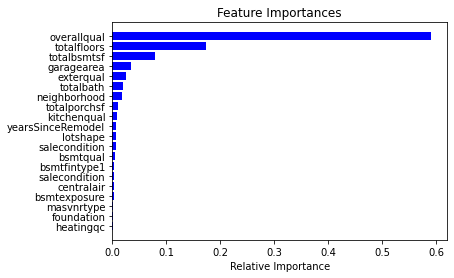

In [114]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = trainX.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [116]:
shap_values = shap.TreeExplainer(model).shap_values(trainX)

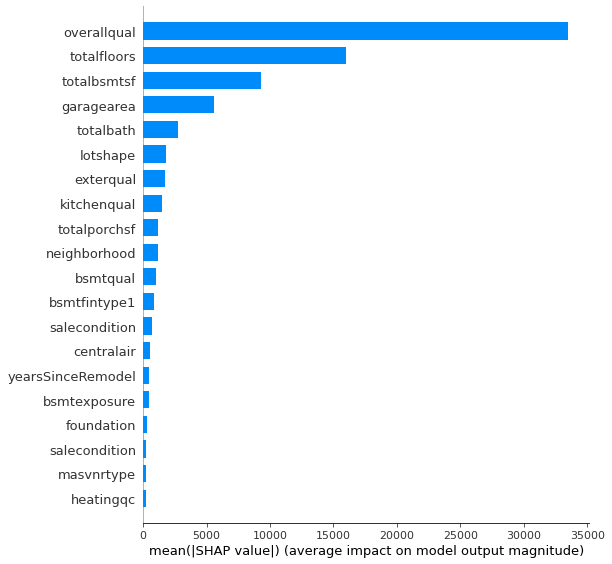

In [117]:
shap.summary_plot(shap_values, trainX, plot_type="bar")

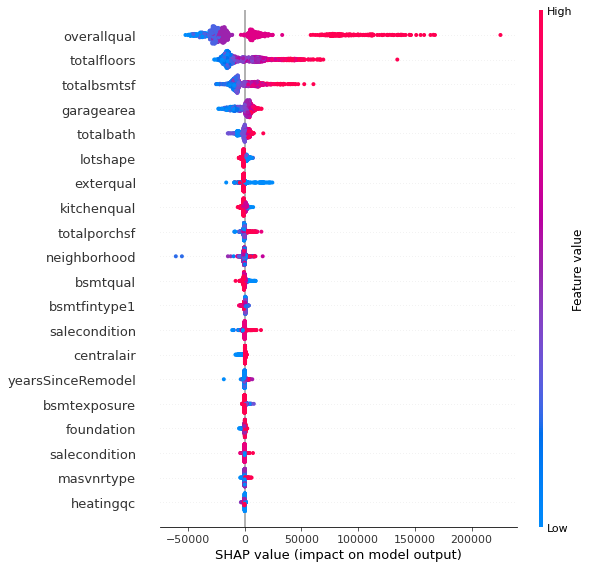

In [119]:
shap.summary_plot(shap_values, trainX)